In [1]:
# import data frame library
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Visualization LIbrary
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling Library
import scipy.stats as stats
import statsmodels.stats.proportion as sp
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, XGBRegressor
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [2]:
dataset = pd.read_csv('marketing_campaign.csv', delimiter = ';')

marketing_campaign is a response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

# Contains
AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain - 1 if customer complained in the last 2 years

DtCustomer - date of customer’s enrolment with the company

Education - customer’s level of education

Marital - customer’s marital status

Kidhome - number of small children in customer’s household

Teenhome - number of teenagers in customer’s household

Income - customer’s yearly household income

MntFishProducts - amount spent on fish products in the last 2 years

MntMeatProducts - amount spent on meat products in the last 2 years

MntFruits - amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - amount spent on wine products in the last 2 years

MntGoldProds - amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalogue

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through company’s web site

NumWebVisitsMonth - number of visits to company’s web site in the last month

Recency - number of days since the last purchase

In [3]:
dataset.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1251,8534,1952,Graduation,Married,67433.0,0,2,2013-07-16,51,615,...,4,0,1,0,0,0,0,3,11,0
922,4487,1969,Master,Single,39858.0,1,0,2013-01-24,67,15,...,6,0,0,0,0,0,0,3,11,1
830,4887,1976,PhD,Divorced,55412.0,1,1,2013-11-22,65,10,...,5,0,0,0,0,0,0,3,11,0
1115,4356,1971,Graduation,Together,71819.0,0,1,2013-08-28,70,1224,...,6,0,1,1,0,0,0,3,11,0
2003,6679,1966,Graduation,Single,33279.0,0,0,2014-06-12,29,10,...,3,0,0,0,0,0,0,3,11,0
919,4637,1954,PhD,Single,74637.0,0,0,2013-05-18,73,960,...,3,0,0,0,1,0,0,3,11,0
906,10150,1961,Graduation,Single,86429.0,0,0,2013-11-21,10,464,...,2,0,0,0,1,0,0,3,11,1
1028,10175,1958,PhD,Divorced,32173.0,0,1,2013-08-01,0,18,...,4,0,0,0,0,0,0,3,11,0
1777,164,1977,PhD,Married,28973.0,0,0,2012-10-13,59,206,...,8,0,0,0,0,0,0,3,11,0
1128,8977,1985,Basic,Single,16581.0,0,0,2013-01-12,51,1,...,4,0,0,0,0,0,0,3,11,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
dataset.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Exploratory Data Analysis

1. Columns `Born` ,`Recency`, `Z_costContract`, `Z_Revenue` can show that is distribution normal columns
2. Columns `Income`, `MntWines`, `MntFruits`, `MnMeatProducts`, `MntFishProducts` can show that have skewness positive because mean > median
3. Columns `Kidhome`, `Teenhome`, `AccepredCmp 1-5`, `Complain`, `Respone` can show that is boolean columns

In [6]:
# Changing Columns Name

dataset.rename(columns={'Year_Birth' : 'Born'}, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Born                 2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Spending = dataset.groupby(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])['ID'].sum()
# Spending.info()

In [7]:
# grouping by type
nums = ['Born', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'MntSweetProducts', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
cats = ['Education', 'Marital_Status']

nums is numeric

cats is category

In [8]:
dataset[nums].describe()

,Born,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
dataset[cats].describe()

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [10]:
# Replacing Data
dataset['Marital_Status'].replace(['Alone',], 'Single', inplace=True)
dataset['Marital_Status'].replace(['Absurd','YOLO'], 'Others', inplace=True)

dataset['Education'].replace(['2n Cycle',], 'Master', inplace=True)

In [11]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(dataset[col].value_counts())
    print()

Value count kolom Education:
Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

Value count kolom Marital_Status:
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Others        4
Name: Marital_Status, dtype: int64



In [12]:
# Count target value
dataset['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

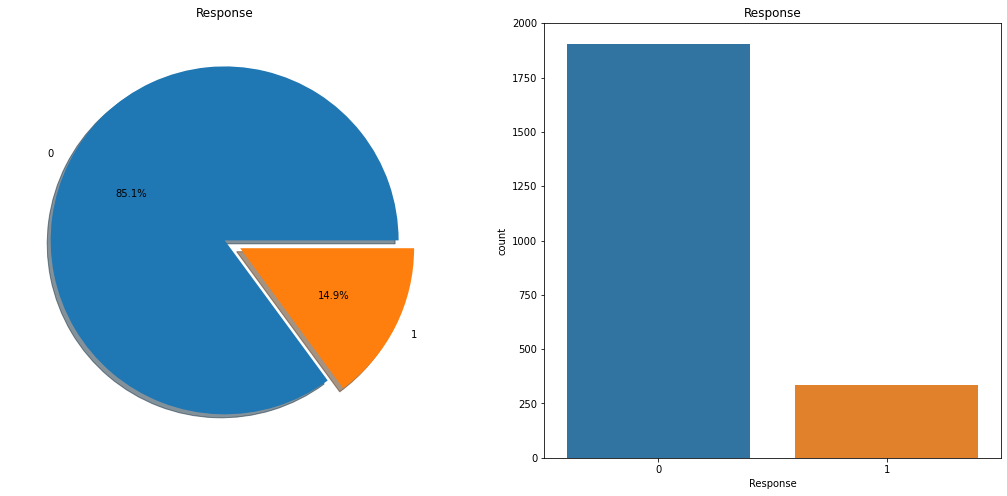

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Response'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
sns.countplot('Response',data=dataset,ax=ax[1])
ax[1].set_title('Response')
plt.show()

In this plot, the result is the value 0 has more values than 1 with a percentage of 85.1% while the value 1 has percentage of 14.9%. According to the response data, it can be said that more people did not receive the campaign.

# Feature Engineering

In [14]:
dataset.Dt_Customer = pd.to_datetime(dataset.Dt_Customer, dayfirst = False)
dataset['Year'] = pd.DataFrame(dataset['Dt_Customer'].dt.year)
dataset['Month'] = pd.DataFrame(dataset['Dt_Customer'].dt.month)
dataset['Day'] = pd.DataFrame(dataset['Dt_Customer'].dt.day)

In [15]:
dataset.drop(columns='Dt_Customer', inplace=True)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Born                 2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

# Univariate Analysis
is analysis used to one variable with the purpose to know and identify characteristics from that variable. Futhermore, the purpose is to take the result with used various analysis inferential which may be used.

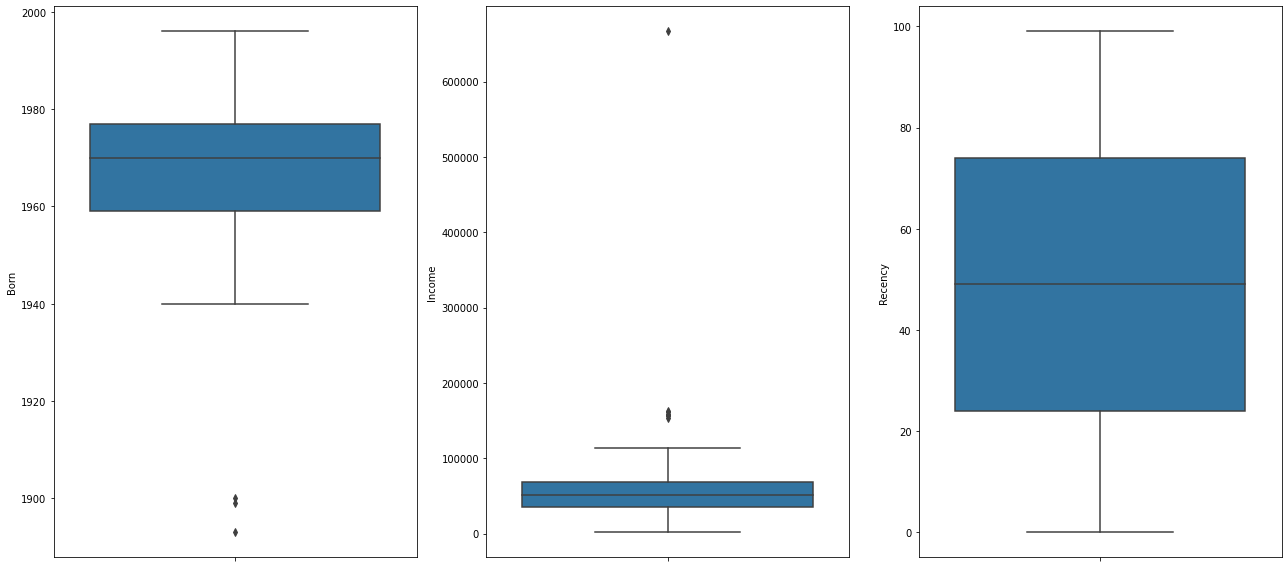

In [20]:
# Boxplot Visualization
nums_invest = ['Born', 'Income','Recency']
f,ax=plt.subplots(1,2,figsize=(18,8))
for i in range(0, len(nums_invest)):
  plt.subplot(1, len(nums_invest), i+1)
  sns.boxplot(y=dataset[nums_invest[i]], orient='v')
  plt.tight_layout()

From this boxplot we can say there are outliers in `Born` and `Income`

# Distplot
is stands for distribution plot, which takes as an input array and plots a curve corresponding to the distribution of points in the array.

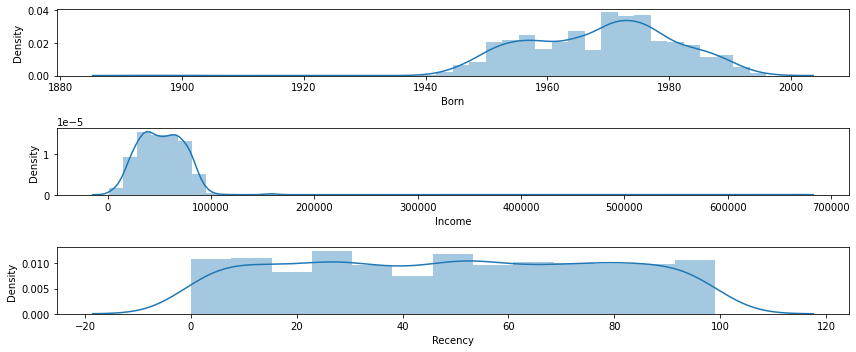

In [21]:
# Distplot Visualization
plt.figure(figsize=(12, 5))
for i in range(0, len(nums_invest)):
    plt.subplot(3, len(nums_invest)/2, i+1)
    sns.distplot(dataset[nums_invest[i]])
    plt.tight_layout();

From Distplot Visualization we can say that in column `Born` most born in about 1970, in column `Income` we have normal distribution and in column `Recency` we have equal value

# KDE plot
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram

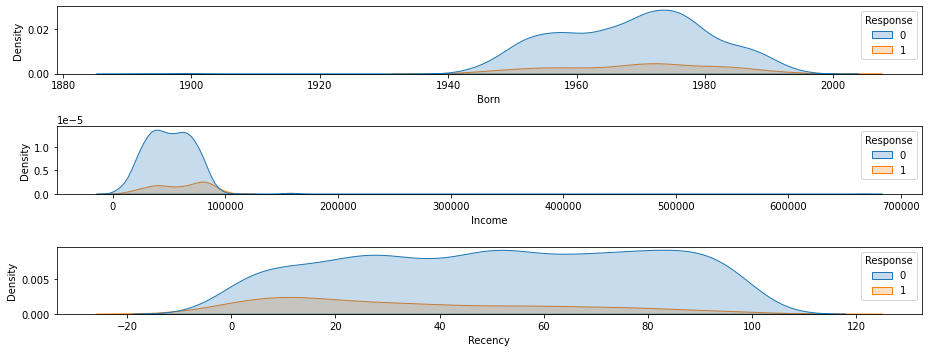

In [22]:
# KDEplot with Target Hue
plt.figure(figsize=(13, 5))
for i in range(0, len(nums_invest)):
    plt.subplot(3, len(nums_invest)/2, i+1)
    sns.kdeplot(data=dataset, x=dataset[nums_invest[i]], hue='Response', fill='True')
    plt.tight_layout()

In every columns we've got bad response

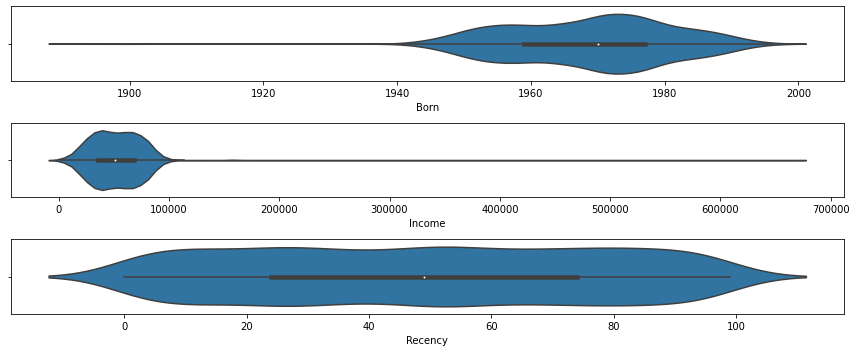

In [23]:
# Violinplot Visualization
plt.figure(figsize=(12, 5))
for i in range(0, len(nums_invest)):
    plt.subplot(3, len(nums_invest)/2, i+1)
    sns.violinplot(dataset[nums_invest[i]])
    plt.tight_layout()

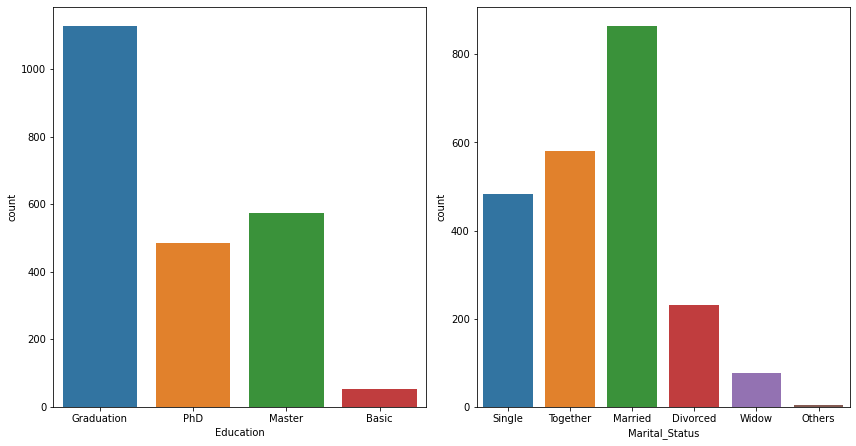

In [24]:
# Countplot Visualization
plt.figure(figsize=(12, 12))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(dataset[cats[i]], orient='v')
    plt.tight_layout()

In countplot we've got :
1. in column `Education` obtained the first is Graduation has the highest value more than 1000 and the second is PhD after that Master than 2n Cycle and the lowest is Basic Education
2. in column `Marital_Status` obtained the highest is Married status
3. in column `Dt_Customer` obtained absurd because we have many date in this column

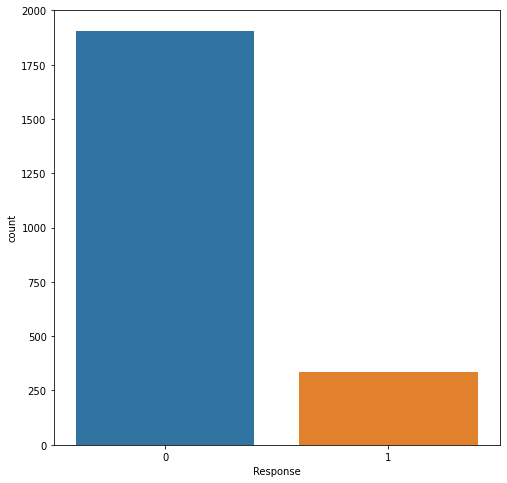

In [25]:
# countplot Target Visualization
plt.figure(figsize=(8,8))
sns.countplot(x=dataset['Response'], data=dataset);

The target is Response and we got 0 is higher than 1, and the result is customer don't accepted the offered in the last campaign

# Multivariate Analysis
Multivariate analysis is a more complex form of statistical and statistical analysis technique and is used when there are more than two variables in a data set.

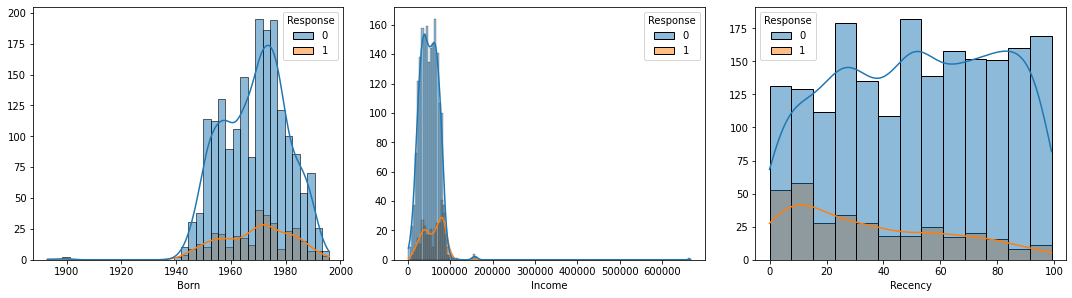

In [26]:
# Multivariate Analysis
# Histoplot
plt.figure(figsize=(15,12))
for i in range(0, len(nums_invest)):
  plt.subplot(len(nums_invest), 3, i+1)
  sns.histplot(data=dataset, x=dataset[nums_invest[i]], hue=dataset['Response'], fill=True, kde='True')
  plt.tight_layout()
  plt.ylabel(None)

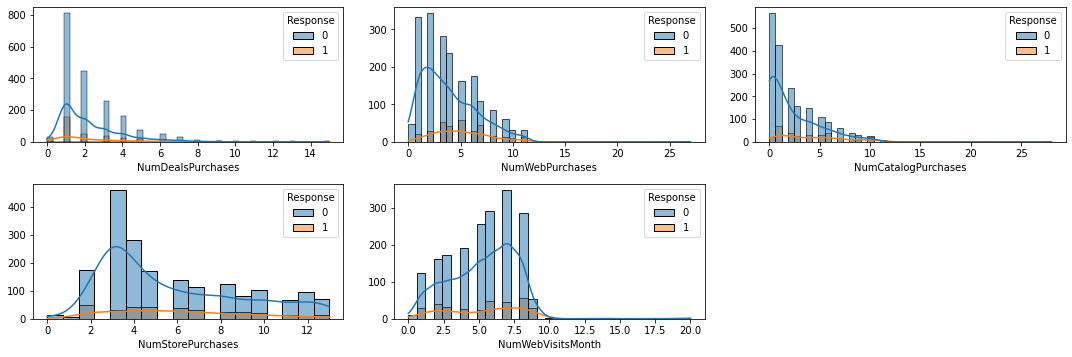

In [28]:
# Multivariate Analysis
# Histoplot
Num = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
plt.figure(figsize=(15,12))
for i in range(0, len(Num)):
  plt.subplot(len(Num), 3, i+1)
  sns.histplot(data=dataset, x=dataset[Num[i]], hue=dataset['Response'], fill=True, kde='True')
  plt.tight_layout()
  plt.ylabel(None)

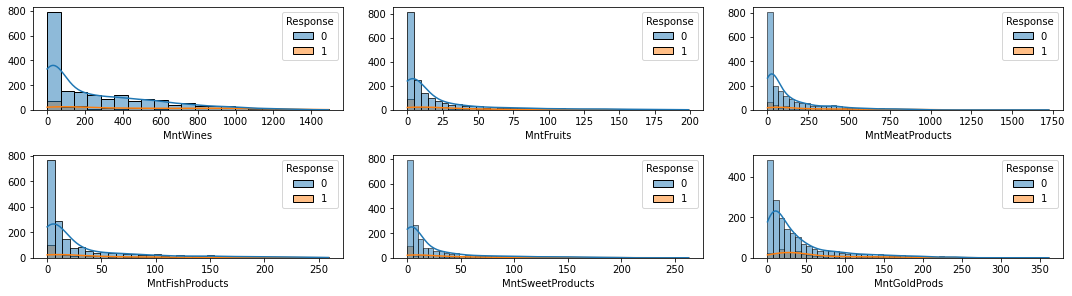

In [29]:
Mnt = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
plt.figure(figsize=(15,12))
for i in range(0, len(Mnt)):
  plt.subplot(len(Mnt), 3, i+1)
  sns.histplot(data=dataset, x=dataset[Mnt[i]], hue=dataset['Response'], fill=True, kde='True')
  plt.tight_layout()
  plt.ylabel(None)

In [30]:
df_project = dataset.copy()

# Remove 'Income' Outlier with IQR Limit

print(f'Rows before treatment: {len(df_project)}')

filtered_entries = np.array([True] * len(df_project))
for col in ['Income']:
    Q1 = df_project[col].quantile(0.25)
    Q3 = df_project[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_project[col] >= low_limit) & (df_project[col] <= high_limit)) & filtered_entries
    
df_project = df_project[filtered_entries]

print(f'Rows after treatment: {len(df_project)}')
print('Low limit : ', low_limit)
print('High Limit : ', high_limit)

Rows before treatment: 2240
Rows after treatment: 2208
Low limit :  -14525.5
High Limit :  118350.5


In [31]:
#Checking the observations marked as outliers
dataset[dataset.Income>high_limit]

,ID,Born,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Day
164,8475,1973,PhD,Married,157243.0,0,1,98,20,2,...,0,0,0,0,3,11,0,2014,3,1
617,1503,1976,PhD,Together,162397.0,1,1,31,85,1,...,0,0,0,0,3,11,0,2013,6,3
655,5555,1975,Graduation,Divorced,153924.0,0,0,81,1,1,...,0,0,0,0,3,11,0,2014,2,7
687,1501,1982,PhD,Married,160803.0,0,0,21,55,16,...,0,0,0,0,3,11,0,2012,8,4
1300,5336,1971,Master,Together,157733.0,1,0,37,39,1,...,0,0,0,0,3,11,0,2013,6,4
1653,4931,1977,Graduation,Together,157146.0,0,0,13,1,0,...,0,0,0,0,3,11,0,2013,4,29
2132,11181,1949,PhD,Married,156924.0,0,0,85,2,1,...,0,0,0,0,3,11,0,2013,8,29
2233,9432,1977,Graduation,Together,666666.0,1,0,23,9,14,...,0,0,0,0,3,11,0,2013,6,2


1. We have 8 observation with income greater than high limit
2. We have 3 observation with total_spending greater that 1000

In [33]:
dataset.drop(index=[2233, 617, 1300, 655, 2132], inplace=True)

## Check the distribution for Income

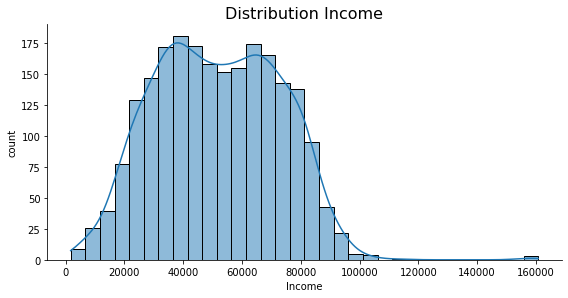

In [34]:
sns.displot(dataset['Income'], kde=True, height=4, aspect=2)
plt.title('Distribution Income', size=16, )
plt.xlabel('Income')
plt.ylabel('count');

We can show that distribution have a normal distribution because we have to handle for outliers and we fill into Income with median

In [35]:
dataset['Income'].fillna(dataset.Income.median(), inplace=True)
print(dataset['Income'])

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2235, dtype: float64


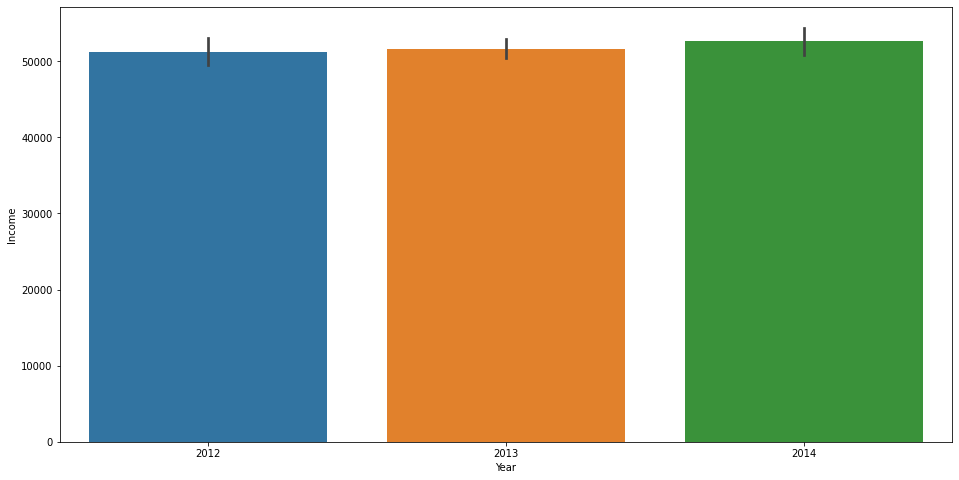

In [36]:
plt.figure(figsize=(16,8))
sns.barplot(x='Year', y='Income', data=dataset)
plt.show()

the amount of income each year is almost the same but in 2014 but in 2014 it has a slightly more value than the others

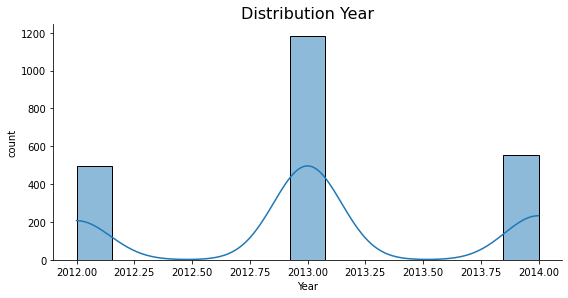

In [37]:
sns.displot(dataset['Year'], kde=True, height=4, aspect=2)
plt.title('Distribution Year', size=16, )
plt.xlabel('Year')
plt.ylabel('count');

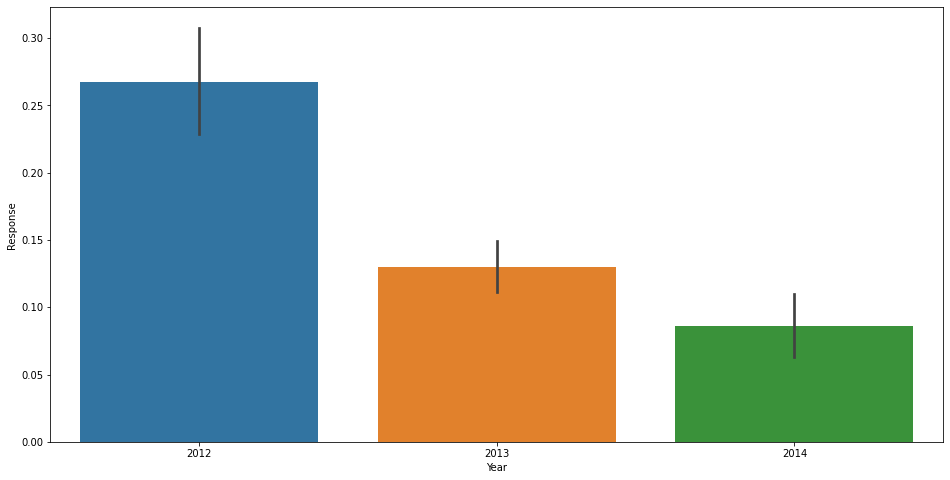

In [38]:
plt.figure(figsize=(16,8))
sns.barplot(x='Year', y='Response', data=dataset)
plt.show()

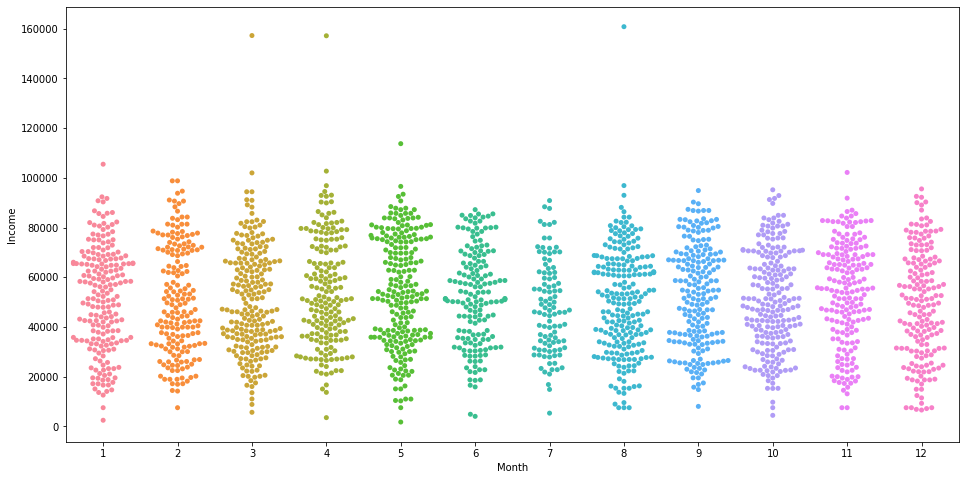

In [39]:
plt.figure(figsize=(16,8))
sns.swarmplot(x='Month', y='Income', data=dataset)
plt.show()

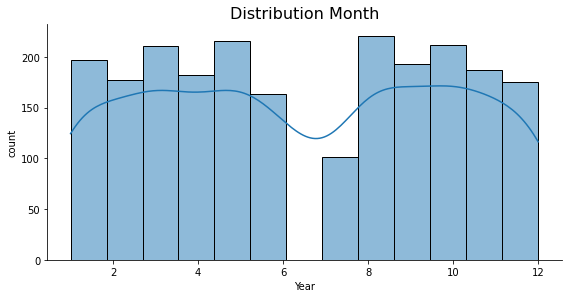

In [47]:
sns.displot(dataset['Month'], kde=True, height=4, aspect=2)
plt.title('Distribution Month', size=16, )
plt.xlabel('Year')
plt.ylabel('count');

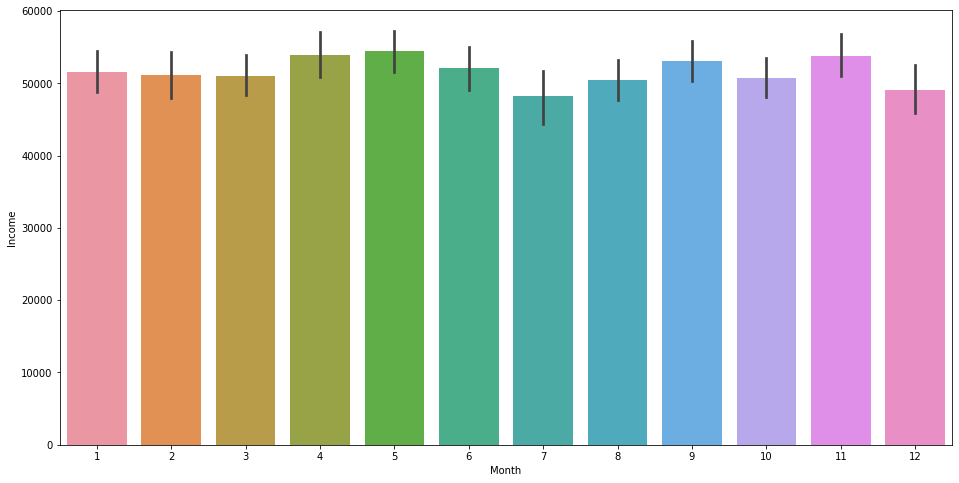

In [46]:
plt.figure(figsize=(16,8))
sns.barplot(x='Month', y='Income', data=dataset)
plt.show()

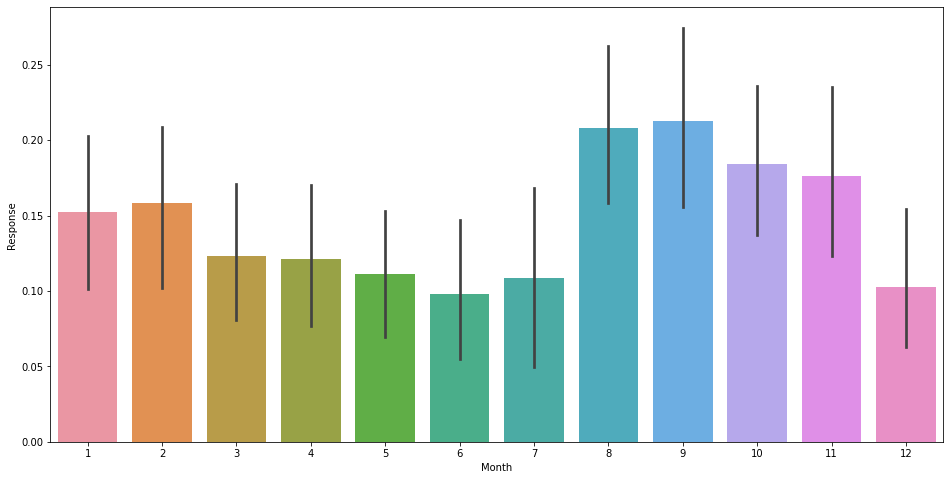

In [41]:
plt.figure(figsize=(16,8))
sns.barplot(x='Month', y='Response', data=dataset)
plt.show()

In [42]:
# Mean for income customers
dataset['Income'].mean()

51774.1033557047

# What will those with higher than average income receive the existing campaign?

              Income < 51744
AcceptedCmp1        0.524017
AcceptedCmp2        0.349345
AcceptedCmp3        8.034934
AcceptedCmp4        2.532751
AcceptedCmp5        0.174672
              Income > 51744
AcceptedCmp1       12.660550
AcceptedCmp2        2.385321
AcceptedCmp3        6.513761
AcceptedCmp4       12.660550
AcceptedCmp5       14.770642


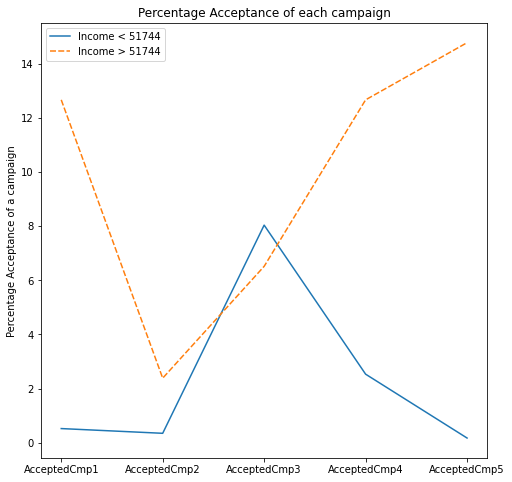

In [43]:
ds1 = dataset[dataset['Income']< 51774]
ds2 = dataset[dataset['Income']> 51774]

AccCmp = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

campaign1 = pd.DataFrame((ds1[AccCmp].sum()/len(ds1)*100), columns = ['Income < 51744'])
campaign2 = pd.DataFrame((ds2[AccCmp].sum()/len(ds2)*100), columns = ['Income > 51744'])
print(campaign1)
print(campaign2)

new_data = pd.concat([campaign1, campaign2], axis=1)

plt.figure(figsize=(8,8))
sns.lineplot(data=new_data)
plt.title("Percentage Acceptance of each campaign")
plt.ylabel("Percentage Acceptance of a campaign")
plt.show()

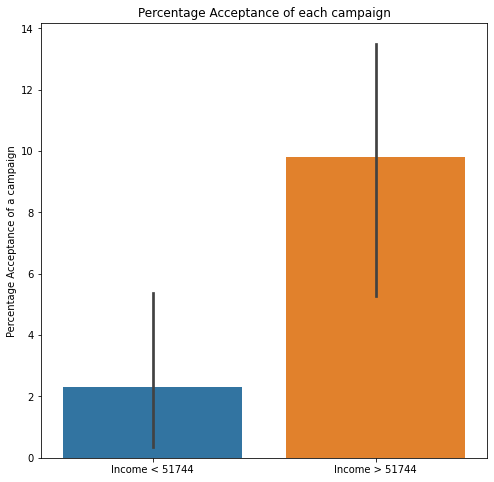

In [44]:
plt.figure(figsize=(8,8))
sns.barplot(data=new_data)
plt.title("Percentage Acceptance of each campaign")
plt.ylabel("Percentage Acceptance of a campaign")
plt.show()

With this graph, we can see that Accepted 5 with Income > 51744 have a higher of percentage but when Income < 51744 have a lower of percentage 

In [48]:
def amount_per_campaign(columns_name):
    p1=pd.DataFrame(dataset.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    p2=pd.DataFrame(dataset.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    p3=pd.DataFrame(dataset.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    p4=pd.DataFrame(dataset.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    p5=pd.DataFrame(dataset.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    pd.concat([p1,p2,p3,p4,p5],axis=0).set_index([AccCmp]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average amount spend on' + ' ' + columns_name)
    plt.show()

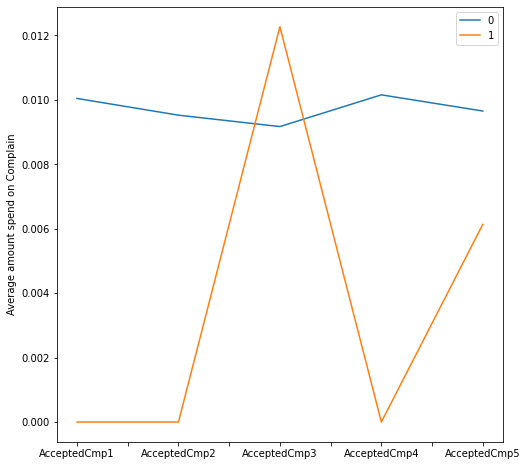

In [ ]:
amount_per_campaign('Complain')

it can be seen that for not complaining has a stagnant value, while for those who complain it has a value that goes up and down

In [49]:
def Cats_Campaign_Relation(dataset, column_name):
    c1=(dataset.groupby([column_name]).sum()['AcceptedCmp1']/dataset.groupby([column_name]).count()['AcceptedCmp1'])
    c2=(dataset.groupby([column_name]).sum()['AcceptedCmp2']/dataset.groupby([column_name]).count()['AcceptedCmp2'])
    c3=(dataset.groupby([column_name]).sum()['AcceptedCmp3']/dataset.groupby([column_name]).count()['AcceptedCmp3'])
    c4=(dataset.groupby([column_name]).sum()['AcceptedCmp4']/dataset.groupby([column_name]).count()['AcceptedCmp4'])
    c5=(dataset.groupby([column_name]).sum()['AcceptedCmp5']/dataset.groupby([column_name]).count()['AcceptedCmp5'])
    df_new=pd.concat([c1,c2,c3,c4,c5],axis=1).T
    plt.figure(figsize=(8,8))
    sns.lineplot(data=df_new, markers=True, linewidth=2)
    plt.ylabel('Percentage Acceptance')
    plt.show()

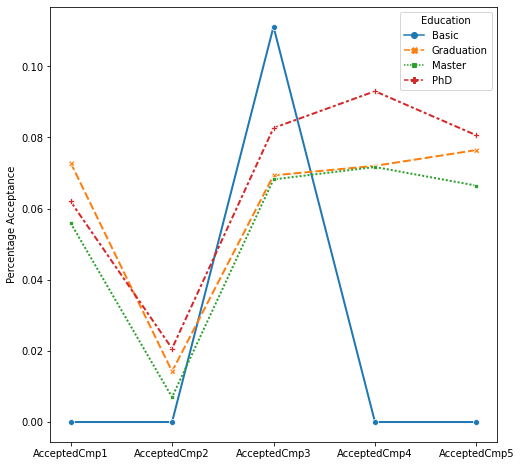

In [ ]:
Cats_Campaign_Relation(dataset, 'Education')

In [50]:
edu_probs = dataset.groupby(['Education', 'Response']).agg({
    'ID': ['count']
}).reset_index()

edu_probs.columns = ['Education', 'Response','AccCmp']

edu_probs = pd.pivot_table(edu_probs,
                             index = 'Education',
                             columns = 'Response',
                             values = 'AccCmp').reset_index()

edu_probs.columns = ['Education','not_response','response']
edu_probs['response_probs'] = (edu_probs['response']/(edu_probs['not_response']+edu_probs['response']))*100
edu_probs = edu_probs.sort_values('response_probs', ascending=False).reset_index(drop=True)
edu_probs

,Education,not_response,response,response_probs
0,PhD,383,101,20.867769
1,Master,493,79,13.811189
2,Graduation,973,152,13.511111
3,Basic,52,2,3.703704


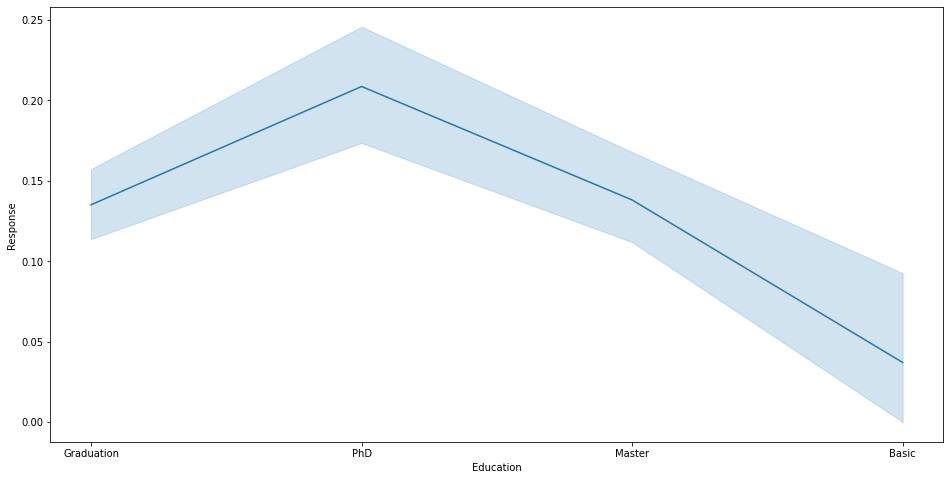

In [51]:
plt.figure(figsize=(16,8))
sns.lineplot(x='Education', y='Response', data=dataset)
plt.show()

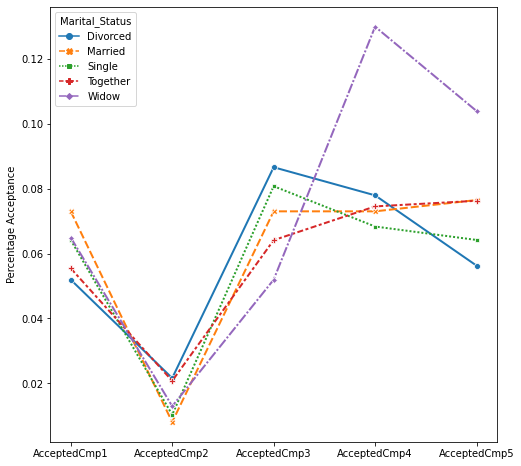

In [52]:
df_other = dataset[dataset['Marital_Status']!= 'Others']

Cats_Campaign_Relation(df_other, 'Marital_Status')

In [53]:
marital_probs = dataset.groupby(['Marital_Status', 'Response']).agg({
    'ID': ['count']
}).reset_index()

marital_probs.columns = ['Marital_Status', 'Response','AccCmp']

marital_probs = pd.pivot_table(marital_probs,
                             index = 'Marital_Status',
                             columns = 'Response',
                             values = 'AccCmp').reset_index()

marital_probs.columns = ['Marital_Status','not_response','response']
marital_probs['response_probs'] = (marital_probs['response']/(marital_probs['not_response']+marital_probs['response']))*100
marital_probs = marital_probs.sort_values('response_probs', ascending=False).reset_index(drop=True)
marital_probs

,Marital_Status,not_response,response,response_probs
0,Others,2,2,50.000000
1,Widow,58,19,24.675325
2,Single,376,107,22.153209
3,Divorced,183,48,20.779221
4,Married,765,98,11.355736
5,Together,517,60,10.398614


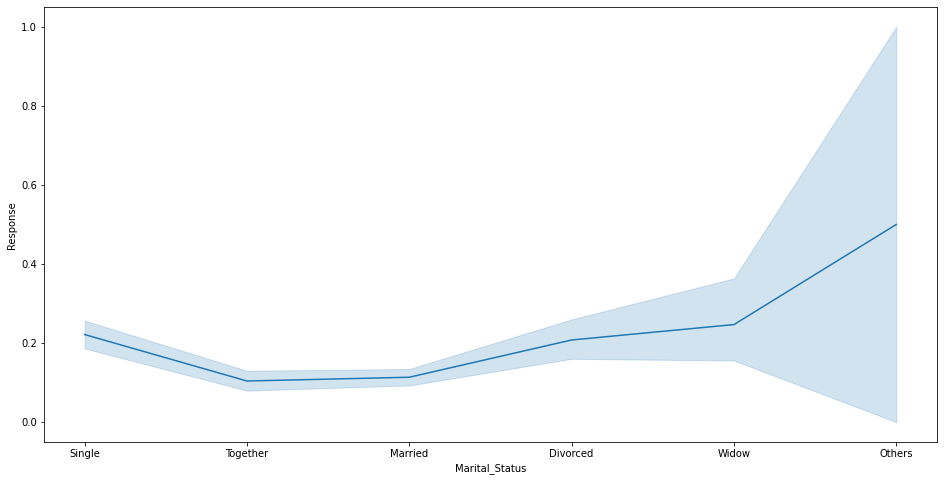

In [54]:
plt.figure(figsize=(16,8))
sns.lineplot(x='Marital_Status', y='Response', data=dataset)
plt.show()

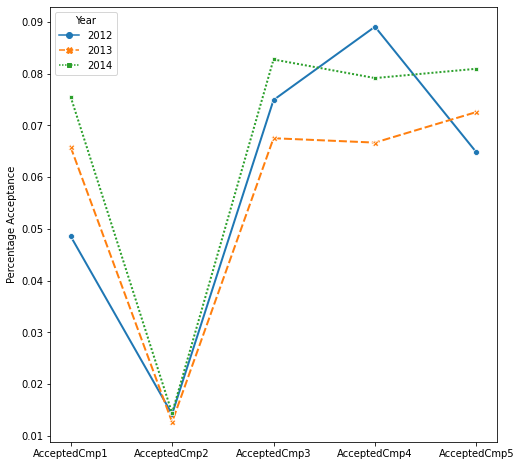

In [55]:
Cats_Campaign_Relation(dataset, 'Year')

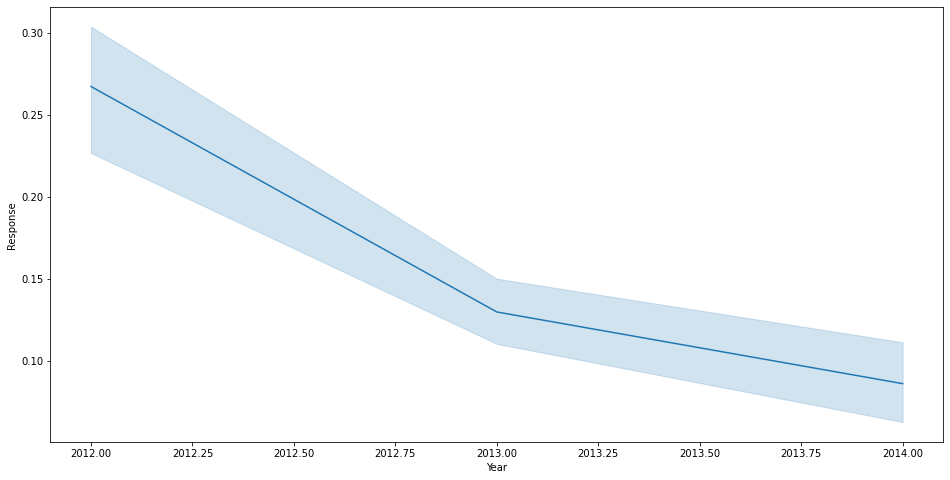

In [57]:
plt.figure(figsize=(16,8))
sns.lineplot(x='Year', y='Response', data=dataset)
plt.show()

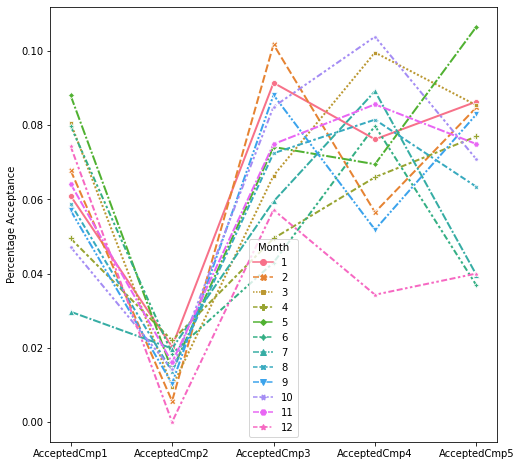

In [56]:
Cats_Campaign_Relation(dataset, 'Month')

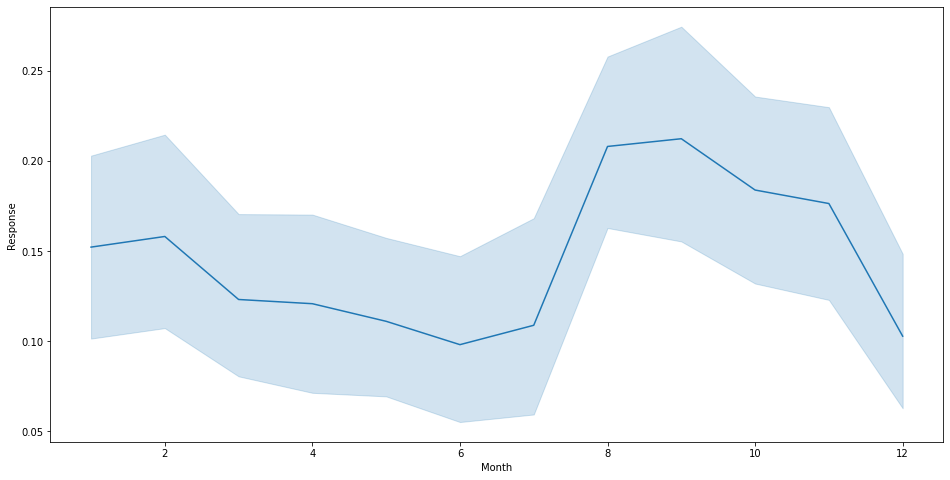

In [58]:
plt.figure(figsize=(16,8))
sns.lineplot(x='Month', y='Response', data=dataset)
plt.show()

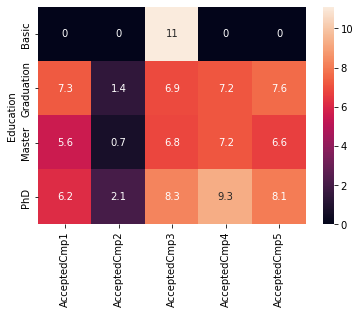

In [59]:
sns.heatmap(dataset.groupby('Education').sum()[AccCmp]/dataset.groupby('Education').count()[AccCmp]*100, annot=True);

In [60]:
data_clean = dataset.copy()

In [61]:
import pandas as pd
dummies_edu = pd.get_dummies(data_clean['Education'])
data_clean = pd.concat([data_clean, dummies_edu], axis=1)

In [63]:
# dummies_mar = pd.get_dummies(data_clean['Marital_Status']!= 'Others')
# data_clean = pd.concat([data_clean, dummies_mar], axis=1) 
# data_clean['Marital_Status'].value_counts()
for cat in ['Marital_Status']:
    onehots = pd.get_dummies(data_clean[cat], prefix=cat)
    data_clean = data_clean.join(onehots)

In [64]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2235 non-null   int64  
 1   Born                     2235 non-null   int64  
 2   Education                2235 non-null   object 
 3   Marital_Status           2235 non-null   object 
 4   Income                   2235 non-null   float64
 5   Kidhome                  2235 non-null   int64  
 6   Teenhome                 2235 non-null   int64  
 7   Recency                  2235 non-null   int64  
 8   MntWines                 2235 non-null   int64  
 9   MntFruits                2235 non-null   int64  
 10  MntMeatProducts          2235 non-null   int64  
 11  MntFishProducts          2235 non-null   int64  
 12  MntSweetProducts         2235 non-null   int64  
 13  MntGoldProds             2235 non-null   int64  
 14  NumDealsPurchases       

In [65]:
dataset.duplicated().sum()

0

In [67]:
features = ['Born','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
            'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Year','Month','Day','Basic','Graduation','Master','PhD','Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single','Marital_Status_Together','Marital_Status_Widow']

df_pre = data_clean.copy()
df_pre = df_pre.drop(columns=['ID','Education','Marital_Status'])

In [69]:
ori_type = ['int64', 'uint8']
feat_df_pre = df_pre.select_dtypes(include = ori_type)
feat_ori = feat_df_pre.columns
print(feat_ori)

Index(['Born', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Year', 'Month', 'Day', 'Basic', 'Graduation', 'Master', 'PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Others', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow'],
      dtype='object')


# Normalization

In [70]:
for i in range(len(features)):
    df_pre[features[i]] = MinMaxScaler().fit_transform(df_pre[features[i]].values.reshape(len(df_pre),1))

In [71]:
df_pre.head()

,Born,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Basic,Graduation,Master,PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Others,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,0.621359,0.354604,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0
1,0.592233,0.280462,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0
2,0.699029,0.439314,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
3,0.883495,0.156632,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0
4,0.854369,0.355579,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,...,0.0,0.0,0.0,1.0,0.0,1.0,0,0.0,0.0,0.0


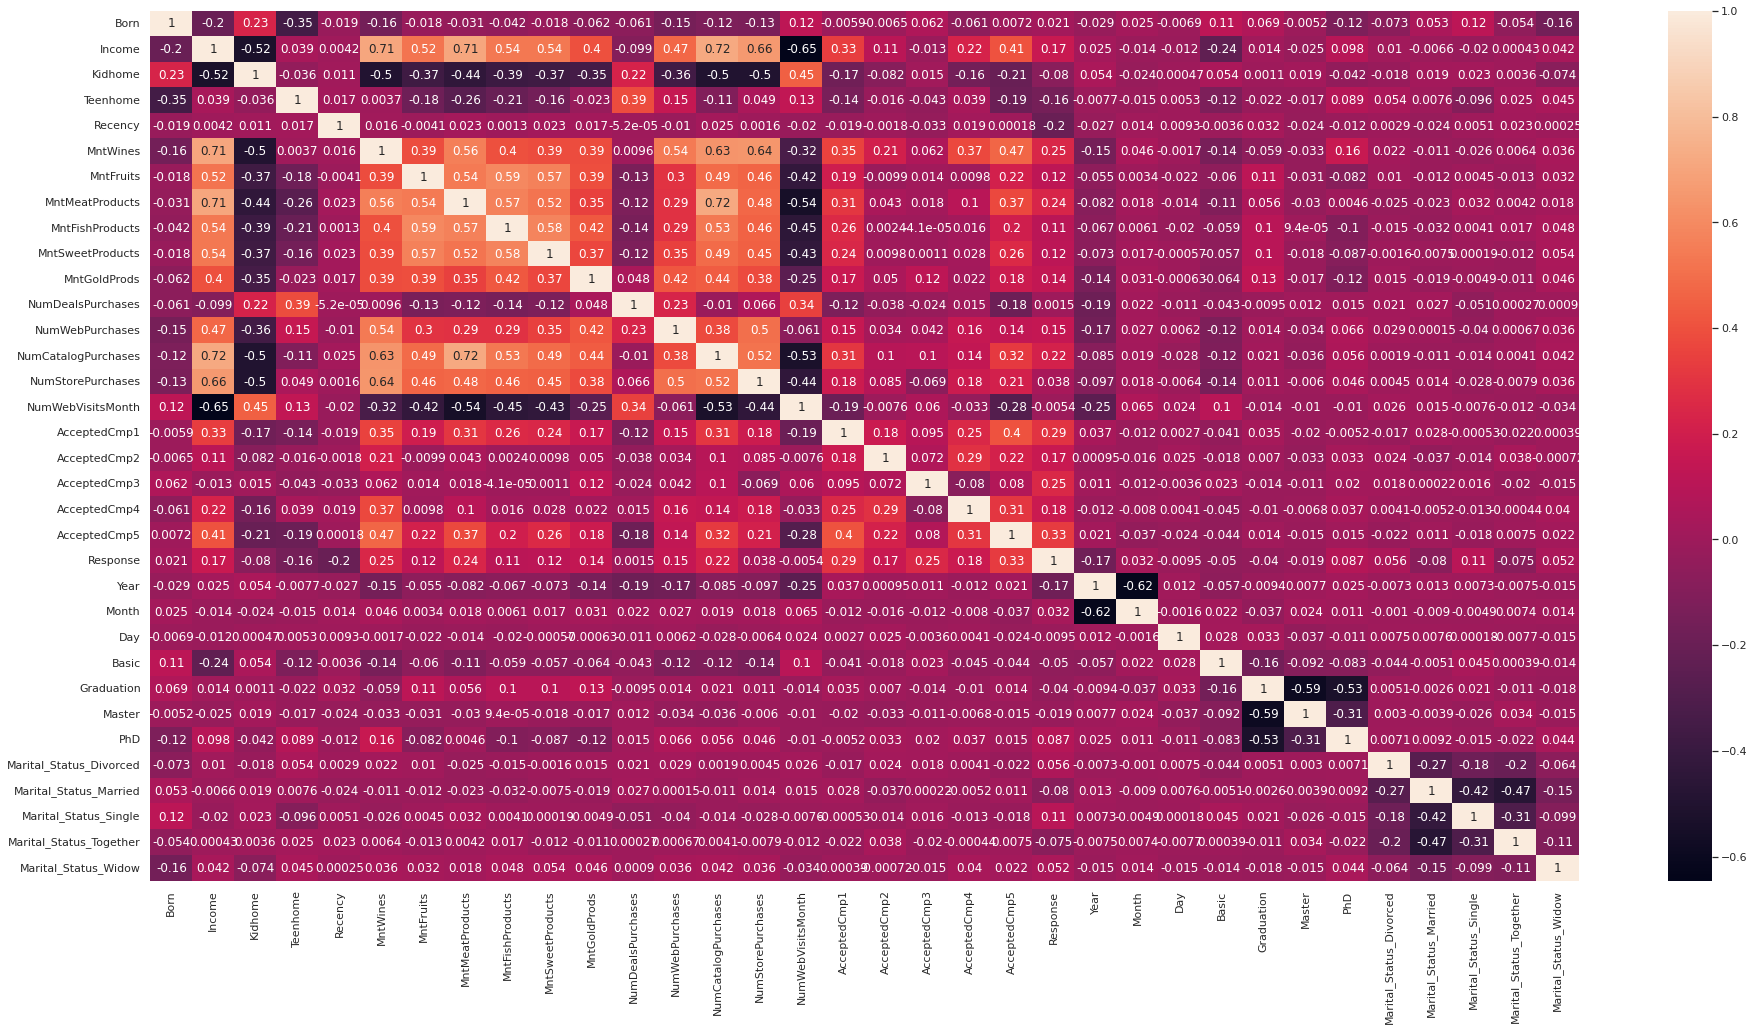

In [72]:
sns.set(rc={'figure.figsize':(32,16)})

sns.heatmap(df_pre[['Born','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
                    'NumStorePurchases','NumWebVisitsMonth', 'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Year','Month','Day','Basic','Graduation','Master','PhD','Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single','Marital_Status_Together','Marital_Status_Widow']].corr(), annot=True)

# plt.savefig('fig/Corr Heat Map of Train n Test.png')

In [73]:
x_norm = df_pre[['Born','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
            'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Year','Month','Day','Basic','Graduation','Master','PhD','Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single','Marital_Status_Together','Marital_Status_Widow']]
y_norm = df_pre['Response']

In [74]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_norm,
                                                y_norm,
                                                test_size=0.2, random_state=42) 

In [75]:
dataset.shape

(2235, 31)

In [76]:
xtrain.shape

(1788, 33)

In [77]:
xtest.shape

(447, 33)

# Random Forest
### RF is a combination of decision trees such that each tree depends on the values of a random vector sampled independently and with the same distribution for all trees in the forest.

### The strength of RF lies in the random selection of features to sort each node, which results in a relatively low error rate

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
rf = RandomForestClassifier (random_state=42)
#rf.fit(x_norm, y_norm)
rf_model = rf.fit(xtrain, ytrain)

In [80]:
y_predicted = rf.predict(xtest)
y_predicted_train = rf.predict(xtrain)

#eval
print('\nclassification report')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       380
         1.0       0.66      0.28      0.40        67

    accuracy                           0.87       447
   macro avg       0.77      0.63      0.66       447
weighted avg       0.85      0.87      0.85       447

Random Forest: ROC AUC =  62.9 %
Random Forest: Precision =  65.5 %
Random Forest: Recall =  28.4 %
Random Forest: Accuracy =  87.0 %
Random Forest: F1-Score =  39.6 %


array([[370,  10],
       [ 48,  19]])

In [81]:
# Model Validation Accuracy
print('train score : ', rf.score(xtrain, ytrain))
print('test score : ', rf.score(xtest, ytest))

train score :  0.993847874720358
test score :  0.8702460850111857


## Hyperparameter Tuning
# Random Forest hyperparameter tuning with Randomized Search

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
               'min_samples_split': [7,8,9,10],
               'min_samples_leaf': [1,2,3,4,5],
               'bootstrap': [True],
               'n_jobs':[-1]}

# Init random forest dengan randomsearch, cross validation = 5
rf = RandomForestClassifier(random_state=42)
clf = RandomizedSearchCV(rf, hyperparameters, cv=20, random_state=42)

#Fitting Model
best_model = clf.fit(xtrain,ytrain)


#Nilai hyperparameters terbaik
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])


#Prediksi menggunakan model baru
y_predicted = best_model.predict(xtest)#Check performa dari model
print('\nclassification report')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Random Forest: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Random Forest: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)

Best n_estimators: 100
Best max_features: auto
Best max_depth: None
Best min_samples_split: 8
Best min_samples_leaf: 1

classification report
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       380
         1.0       0.74      0.30      0.43        67

    accuracy                           0.88       447
   macro avg       0.81      0.64      0.68       447
weighted avg       0.87      0.88      0.86       447

Random Forest: ROC AUC =  64.0 %
Random Forest: Precision =  74.1 %
Random Forest: Recall =  29.9 %
Random Forest: Accuracy =  87.9 %
Random Forest: F1-Score =  42.6 %


array([[373,   7],
       [ 47,  20]])

In [83]:
# Model Validation Accuracy
print('train score : ', best_model.score(xtrain, ytrain))
print('test score : ', best_model.score(xtest, ytest))

train score :  0.9731543624161074
test score :  0.8791946308724832


# K-Nearest Neighbors

### KNN works by finding a number of k patterns (among all the training patterns in all classes) closest to the input pattern, then determining the decision class based on the highest number of patterns among the k patterns (voting).

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_model = knn.fit(xtrain, ytrain)

In [85]:
# Predict Test
ypredicted = knn.predict(xtest)

print('\nclassification report')
print(classification_report(ytest, ypredicted)) # generate the precision, recall, f-1 score, num
print('KNN: ROC AUC = ',str(round(roc_auc_score(ytest, ypredicted)*100,1)), '%')
print('KNN: Precision = ',str(round(precision_score(ytest, ypredicted)*100,1)), '%')
print('KNN: Recall = ',str(round(recall_score(ytest, ypredicted)*100,1)), '%')
print('KNN: Accuracy = ',str(round(accuracy_score(ytest, ypredicted)*100,1)), '%')
print('KNN: F1-Score = ',str(round(f1_score(ytest, ypredicted)*100,1)), '%')
confusion_matrix(ytest, ypredicted)


classification report
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       380
         1.0       0.62      0.19      0.30        67

    accuracy                           0.86       447
   macro avg       0.75      0.59      0.61       447
weighted avg       0.84      0.86      0.83       447

KNN: ROC AUC =  58.6 %
KNN: Precision =  61.9 %
KNN: Recall =  19.4 %
KNN: Accuracy =  86.1 %
KNN: F1-Score =  29.5 %


array([[372,   8],
       [ 54,  13]])

In [86]:
# Model Validation Accuracy
print('train score : ', knn_model.score(xtrain, ytrain))
print('test score : ', knn_model.score(xtest, ytest))

train score :  0.9010067114093959
test score :  0.8612975391498882


# Logistic Regression

### Linear model can be defined as the use of a straight or flat function (for the case of regression) or an appraising function (for the case of classification). Gift. learning on the linear model is to determine two parameters based on a training set.

In [87]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, solver = 'liblinear')
logreg_model = logreg.fit(xtrain, ytrain)

In [88]:
# Predict the test data
y_predicted = logreg.predict(xtest)

In [89]:
y_predicted_proba = logreg.predict_proba(xtest)

In [90]:
print('\nclassification report')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       380
         1.0       0.73      0.45      0.56        67

    accuracy                           0.89       447
   macro avg       0.82      0.71      0.75       447
weighted avg       0.88      0.89      0.88       447

LogReg: ROC AUC =  70.9 %
LogReg: Precision =  73.2 %
LogReg: Recall =  44.8 %
LogReg: Accuracy =  89.3 %
LogReg: F1-Score =  55.6 %


array([[369,  11],
       [ 37,  30]])

In [91]:
# Model Validation Accuracy
print('train score : ', logreg_model.score(xtrain, ytrain))
print('test score : ', logreg_model.score(xtest, ytest))

train score :  0.9004474272930649
test score :  0.8926174496644296


# Decision Tree

###Decision Tree is a machine learning technique that builds a hierarchical sequential structure classification rule representation by recursively partitioning the training data set.

In [92]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt_model = dt.fit(xtrain,ytrain)
y_predicted = dt.predict(xtest)

In [93]:
print('\nclassification report')
print(classification_report(ytest, y_predicted)) # generate the precision, recall, f-1 score, num
print('Decision Tree: ROC AUC = ',str(round(roc_auc_score(ytest, y_predicted)*100,1)), '%')
print('Decision Tree: Precision = ',str(round(precision_score(ytest, y_predicted)*100,1)), '%')
print('Decision Tree: Recall = ',str(round(recall_score(ytest, y_predicted)*100,1)), '%')
print('Decision Tree: Accuracy = ',str(round(accuracy_score(ytest, y_predicted)*100,1)), '%')
print('Decision Tree: F1-Score = ',str(round(f1_score(ytest, y_predicted)*100,1)), '%')
confusion_matrix(ytest, y_predicted)


classification report
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88       380
         1.0       0.36      0.39      0.37        67

    accuracy                           0.81       447
   macro avg       0.63      0.63      0.63       447
weighted avg       0.81      0.81      0.81       447

Decision Tree: ROC AUC =  63.4 %
Decision Tree: Precision =  36.1 %
Decision Tree: Recall =  38.8 %
Decision Tree: Accuracy =  80.5 %
Decision Tree: F1-Score =  37.4 %


array([[334,  46],
       [ 41,  26]])

In [94]:
# Model Validation Accuracy
print('train score : ', dt_model.score(xtrain, ytrain))
print('test score : ', dt_model.score(xtest, ytest))

train score :  0.993847874720358
test score :  0.8053691275167785


In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# list of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion =['entropy']
splitter = ['random']

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'criterion':criterion,
               'splitter': splitter
                }

# Init Logres dengan Gridsearch, cross validation = 5
dt2 = DecisionTreeClassifier(random_state=42)
clf = RandomizedSearchCV(dt2, hyperparameters, cv=5, random_state=42)

#Fitting Model
dt_model = clf.fit(xtrain, ytrain)

#Prediksi menggunakan model baru
y_pred = dt_model.predict(xtest)#Check performa dari model
print('\nclassification report')
print(classification_report(ytest, y_pred)) # generate the precision, recall, f-1 score, num
print('Decision Tree: ROC AUC = ',str(round(roc_auc_score(ytest, y_pred)*100,1)), '%')
print('Decision Tree: Precision = ',str(round(precision_score(ytest, y_pred)*100,1)), '%')
print('Decision Tree: Recall = ',str(round(recall_score(ytest, y_pred)*100,1)), '%')
print('Decision Tree: Accuracy = ',str(round(accuracy_score(ytest, y_pred)*100,1)), '%')
print('Decision Tree: F1-Score = ',str(round(f1_score(ytest, y_pred)*100,1)), '%')
confusion_matrix(ytest, y_pred)


classification report
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       380
         1.0       0.55      0.25      0.35        67

    accuracy                           0.86       447
   macro avg       0.71      0.61      0.63       447
weighted avg       0.83      0.86      0.83       447

Decision Tree: ROC AUC =  60.8 %
Decision Tree: Precision =  54.8 %
Decision Tree: Recall =  25.4 %
Decision Tree: Accuracy =  85.7 %
Decision Tree: F1-Score =  34.7 %


array([[366,  14],
       [ 50,  17]])

In [96]:
# Model Validation Accuracy
print('train score : ', dt_model.score(xtrain, ytrain))
print('test score : ', dt_model.score(xtest, ytest))

train score :  0.8942953020134228
test score :  0.8568232662192393


# XGBOOST

### Those processes are trimming, newton boosting, and extra randomization parameters. The process of pruning or proportional shrinkage of leaf nodes is used to increase the generalizability of the model. the newton boosting process is a process to provide a direct route so that it does not require gradient descent. The parameter randomization process aims to reduce the correlation between trees so as to increase the strength of the ensemble algorithm.

In [97]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

data_dmatrix = xgb.DMatrix(data=x_norm, label=y_norm)

xtrain, xtest, ytrain, ytest = train_test_split(x_norm,
                                                y_norm,
                                                test_size=0.2,
                                                shuffle = True,
                                                stratify = y_norm,
                                                random_state=42) #Splitting the data into Train and Test

xgb_classifier = xgb.XGBClassifier()
xgb_model = xgb_classifier.fit(x_norm, y_norm)
y_predicted = xgb_model.predict(xtest)
y_predicted_train = xgb_model.predict(xtrain)

print("\nClassification Report")
print(classification_report(ytest, y_predicted))
print('XGBoost: ROC AUC = ', str(round(roc_auc_score(ytest, y_predicted)*100,1)),"%")
print('XGBoost: Precision = ', str(round(precision_score(ytest, y_predicted)*100,1)),"%")
print('XGBoost: Recall = ', str(round(recall_score(ytest, y_predicted)*100,1)),"%")
print('XGBoost: Accuracy = ', str(round(accuracy_score(ytest, y_predicted)*100,1)),"%")
print("XGBoost: F1 Score =  ", str(round(f1_score(ytest, y_predicted)*100,1)),"%")
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_predicted)


Classification Report
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       380
         1.0       0.91      0.58      0.71        67

    accuracy                           0.93       447
   macro avg       0.92      0.79      0.83       447
weighted avg       0.93      0.93      0.92       447

XGBoost: ROC AUC =  78.6 %
XGBoost: Precision =  90.7 %
XGBoost: Recall =  58.2 %
XGBoost: Accuracy =  92.8 %
XGBoost: F1 Score =   70.9 %


array([[376,   4],
       [ 28,  39]])

In [98]:
# Model Validation Accuracy
print('train score : ', xgb_model.score(xtrain, ytrain))
print('test score : ', xgb_model.score(xtest, ytest))

train score :  0.9345637583892618
test score :  0.9284116331096197


# XGBOOST Tuning Hyperparameter

In [99]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

data_dmatrix = xgb.DMatrix(data=x_norm, label=y_norm)

xtrain, xtest, ytrain, ytest = train_test_split(x_norm,
                                                y_norm,
                                                test_size=0.2,
                                                shuffle = True,
                                                stratify = y_norm,
                                                random_state=42) #Splitting the data into Train and Test

xgb_classifier = xgb.XGBClassifier(scale_pos_weight = 3.5)
xgb_best_model = xgb_classifier.fit(x_norm, y_norm)
y_predicted = xgb_best_model.predict(xtest)
y_predicted_train = xgb_best_model.predict(xtrain)

print("\nClassification Report")
print(classification_report(ytest, y_predicted))
print('XGBoost: ROC AUC = ', str(round(roc_auc_score(ytest, y_predicted)*100,1)),"%")
print('XGBoost: Precision = ', str(round(precision_score(ytest, y_predicted)*100,1)),"%")
print('XGBoost: Recall = ', str(round(recall_score(ytest, y_predicted)*100,1)),"%")
print('XGBoost: Accuracy = ', str(round(accuracy_score(ytest, y_predicted)*100,1)),"%")
print("XGBoost: F1 Score =  ", str(round(f1_score(ytest, y_predicted)*100,1)),"%")
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_predicted)


Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       380
         1.0       0.71      0.88      0.79        67

    accuracy                           0.93       447
   macro avg       0.84      0.91      0.87       447
weighted avg       0.94      0.93      0.93       447

XGBoost: ROC AUC =  90.9 %
XGBoost: Precision =  71.1 %
XGBoost: Recall =  88.1 %
XGBoost: Accuracy =  92.8 %
XGBoost: F1 Score =   78.7 %


array([[356,  24],
       [  8,  59]])

In [100]:
# Model Validation Accuracy
print('train score : ', xgb_best_model.score(xtrain, ytrain))
print('test score : ', xgb_best_model.score(xtest, ytest))

train score :  0.9272930648769575
test score :  0.9284116331096197


# Modeling Process

In [101]:
print('\nRandom Forest: ROC AUC = 64.0 %')
print('Random Forest: Accuracy = 87.9 %')
print('\nKNN: ROC AUC = 58.6 %')
print('KNN: Accuracy = 86.1 %')
print('\nLogReg: ROC AUC = 70.9.6 %')
print('LogReg: Accuracy = 89.3 %')
print('\nDecision Tree: ROC AUC = 60.8 %')
print('Decision Tree: Accuracy = 85.7 %')
print('\nXGBoost: ROC AUC = 90.9 %')
print('XGBoost: Accuracy = 92.8%')


Random Forest: ROC AUC = 64.0 %
Random Forest: Accuracy = 87.9 %

KNN: ROC AUC = 58.6 %
KNN: Accuracy = 86.1 %

LogReg: ROC AUC = 70.9.6 %
LogReg: Accuracy = 89.3 %

Decision Tree: ROC AUC = 60.8 %
Decision Tree: Accuracy = 85.7 %

XGBoost: ROC AUC = 90.9 %
XGBoost: Accuracy = 92.8%


In [104]:
model = tf.keras.models.Sequential([
                    tf.keras.layers.Dense(512, activation='relu'),
                    tf.keras.layers.Dropout(0.2),
                    tf.keras.layers.Dense(256, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(6, activation='softmax')])
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['Accuracy'])
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') is not None and logs.get('accuracy') >= 0.92:
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()
model.fit(xtrain, ytrain, epochs=50, callbacks=[callbacks])

Epoch 1/50
56/56 [==============================] - 2s 7ms/step - loss: 0.4969 - Accuracy: 0.8445
Epoch 2/50
56/56 [==============================] - 0s 6ms/step - loss: 0.3062 - Accuracy: 0.8826
Epoch 3/50
56/56 [==============================] - 0s 6ms/step - loss: 0.2730 - Accuracy: 0.8870
Epoch 4/50
56/56 [==============================] - 0s 6ms/step - loss: 0.2612 - Accuracy: 0.8954
Epoch 5/50
56/56 [==============================] - 0s 5ms/step - loss: 0.2510 - Accuracy: 0.9004
Epoch 6/50
56/56 [==============================] - 0s 6ms/step - loss: 0.2427 - Accuracy: 0.8999
Epoch 7/50
56/56 [==============================] - 0s 7ms/step - loss: 0.2411 - Accuracy: 0.9094
Epoch 8/50
56/56 [==============================] - 0s 6ms/step - loss: 0.2396 - Accuracy: 0.9072
Epoch 9/50
56/56 [==============================] - 0s 7ms/step - loss: 0.2371 - Accuracy: 0.9094
Epoch 10/50
56/56 [==============================] - 0s 7ms/step - loss: 0.2220 - Accuracy: 0.9128
Epoch 11/50
56/56 [

In [107]:
Total = dataset['ID'].count()
NotResponse =  dataset[dataset['Response']==0]['ID'].count()
Response =  dataset[dataset['Response']==1]['ID'].count()
PredCampaign = 0.92
PredCampaign1 = round(NotResponse*PredCampaign)
PredAcc = NotResponse-PredCampaign1

print('----- Existing -----')
print('\t\t\t','count', 'percentage')
print('Responder : \t\t', Total)
print('NotResponse : \t\t\t', NotResponse, ',', round(NotResponse/Total*100,1),'%')
print('Response : \t\t', Response, ',', round(Response/Total*100,1),'%')
print()
print('----- After Modeling -----')
print('\t\t\t','count', 'percentage')
print('Responder : \t\t', Total)
print('NotResponse : \t\t\t', NotResponse, ',', round(NotResponse/Total*100,1),'%')
print('  Predicted NotResponse : \t', round(PredCampaign1), ',', round(PredCampaign1/NotResponse*100,1),'%')
print('  Predicted Response : \t', round(PredAcc), ',', round(PredAcc/NotResponse*100,1),'%')
print('\nNotResponse After Pred : \t', NotResponse-PredCampaign1, ',', round((NotResponse-PredCampaign1)/Total*100,1),'%')
print('Response : \t\t', Response, ',', round(Response/Total*100,1),'%')
print('Response Pred : \t', Response+PredCampaign1, ',', round((Response+PredCampaign1)/Total*100,1),'%')
print('Response Growth rate : \t', round(((Response+PredCampaign1)/(Response)-1)*100,1), '%')

----- Existing -----
			 count percentage
Responder : 		 2235
NotResponse : 			 1901 , 85.1 %
Response : 		 334 , 14.9 %

----- After Modeling -----
			 count percentage
Responder : 		 2235
NotResponse : 			 1901 , 85.1 %
  Predicted NotResponse : 	 1749 , 92.0 %
  Predicted Response : 	 152 , 8.0 %

NotResponse After Pred : 	 152 , 6.8 %
Response : 		 334 , 14.9 %
Response Pred : 	 2083 , 93.2 %
Response Growth rate : 	 523.7 %
